In [1]:
# define the environment path 
import os
# local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
# with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())
ecoli = kbase_api.get_from_ws("iML1515",76994)
    
import warnings
warnings.filterwarnings(action='once')

from pandas import set_option
set_option("display.max_rows", None)

from time import process_time

cobrakbase 0.2.8


In [ ]:
pf = kbase_api.get_from_ws("iSB1139.kb.gf",30650)
# %run ../../../ModelSEEDpy/modelseedpy/community/mscompatibility.py
%run ../../../ModelSEED/ModelSEEDpy/modelseedpy/community/mscompatibility.py
pf = MSCompatibility.standardize(pf)[0]

In [32]:
succinateIDs = ["cpd00036", "r180"]
source_molecules = set()
for rxn in pf.reactions:
    rxn_met_ids = [met.id for met in rxn.products]
    source_molecules.update(set([react.id for react in rxn.reactants if "cpd00036_c0" in rxn_met_ids]))
    if any([succincate_ID in metID for metID in rxn_met_ids for succincate_ID in succinateIDs]):
        print(rxn.reaction)
        # if any(["cpd00036_c0" in rxn_met_ids]):
        #     print(rxn.reaction)
    
print("\n\nThe molecules that contribute to the creation of Succinate in iSB1139:\n", sorted(list(source_molecules)))

cpd00036_e0 + 2 cpd00067_e0 --> cpd00036_c0 + 2 cpd00067_c0
cpd00260_c0 --> cpd00036_c0 + cpd00040_c0
cpd00001_c0 + cpd03525_c0 --> cpd00023_c0 + cpd00036_c0
cpd00001_c0 + cpd00822_c0 --> cpd00013_c0 + cpd00036_c0 + cpd00094_c0
cpd00078_c0 + cpd00142_c0 <=> cpd00036_c0 + cpd00279_c0
cpd00036_c0 + cpd00067_c0 --> cpd00036_e0 + cpd00067_e0
cpd00001_c0 + r1328_c0 --> cpd00036_c0 + r1146_c0
cpd00007_c0 + cpd00870_c0 + r1313_c0 --> cpd00011_c0 + cpd00036_c0 + cpd00266_c0
cpd00007_c0 + cpd00210_c0 + r1313_c0 --> cpd00011_c0 + cpd00036_c0 + cpd00081_c0 + cpd04122_c0
cpd00239_c0 + cpd00822_c0 --> cpd00036_c0 + cpd00135_c0
cpd02799_c0 <=> cpd00020_c0 + cpd00036_c0
r180_b0 --> cpd00036_e0
cpd00001_c0 + cpd00006_c0 + cpd00199_c0 <=> cpd00005_c0 + cpd00036_c0 + cpd00067_c0


The molecules that contribute to the creation of Succinate in iSB1139:
 ['cpd00001_c0', 'cpd00006_c0', 'cpd00007_c0', 'cpd00036_e0', 'cpd00067_e0', 'cpd00078_c0', 'cpd00142_c0', 'cpd00199_c0', 'cpd00210_c0', 'cpd00239_c0', 'cp

In [37]:
print(dir(pf.objective))
print(pf.objective.variables)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__itruediv__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_canonicalize', '_direction', '_expression', '_expression_expired', '_get_expression', '_name', '_problem', '_substitute_variables', '_validate_optimization_expression_name', '_value', 'clone', 'direction', 'expression', 'from_json', 'get_linear_coefficients', 'is_Linear', 'is_Quadratic', 'name', 'problem', 'set_linear_coefficients', 'to_json', 'value', 'variables']
{0 <= bio1_reverse_b18f7 <= 0, 0 <= bio1 <= 1000}


In [5]:
mysterious_met = pf.metabolites.get_by_id("r180_b0")
print(mysterious_met.name, mysterious_met.compartment, mysterious_met.reactions)

succinate b0 frozenset({<ModelReaction MIRXN__DASH__83_e0 at 0x1719b2e20d0>})


In [16]:
for rxn in pf.reactions:
    if any([met.compartment == "b0" for met in rxn.products+rxn.reactants]):
        print(rxn.reaction, "\t\t\t\t", [met.name for met in rxn.products+rxn.reactants])        

r142_b0 --> cpd00266_e0 				 ['Carnitine', 'L-carnitine']
r133_b0 --> cpd00001_e0 				 ['H2O', 'H2O']
r132_b0 --> cpd11640_e0 				 ['H2', 'H2']
r136_b0 --> cpd01113_e0 				 ['Hexanoate', 'Hexanoate (n-C6:0)']
r134_b0 --> cpd00214_e0 				 ['Palmitate', 'Hexadecanoate (n-C16:0)']
r138_b0 --> cpd00205_e0 				 ['K+', 'K+']
r137_b0 --> cpd00260_e0 				 ['Isocitrate', 'isocitrate']
r140_b0 --> cpd00051_e0 				 ['L-Arginine', 'L-arginine']
r139_b0 --> cpd00035_e0 				 ['L-Alanine', 'L-alanine']
r1399_c0 --> r274_b0 				 ['protoheme IX', 'protoheme IX']
cpd00060_c0 --> r254_b0 				 ['L-methionine', 'L-Methionine']
cpd00066_c0 --> r255_b0 				 ['L-phenylalanine', 'L-Phenylalanine']
cpd00039_c0 --> r252_b0 				 ['L-lysine', 'L-Lysine']
cpd00130_c0 --> r253_b0 				 ['malate', 'L-Malate']
cpd00161_c0 --> r259_b0 				 ['L-threonine', 'L-Threonine']
cpd00069_c0 --> r260_b0 				 ['L-tyrosine', 'L-Tyrosine']
cpd00129_c0 --> r256_b0 				 ['L-proline', 'L-Proline']
cpd00054_c0 --> r258_b0 				 ['L-serin

In [2]:
# %run ../../../ModelSEED/ModelSEEDpy/modelseedpy/community/mscompatibility.py
# MSCompatibility.standardize(ecoli)

In [2]:
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        "species":["ecoli"],
        'content': 'biomass'
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial, conc):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

# Maltose

## G2, 1:20 Ecoli:PF

In [2]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': ["cpd00029"], #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': ["cpd00179"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': ["cpd00029"], # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': ["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        },
    # msdb_path = "../../../ModelSEED/ModelSEEDDatabase",
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:108: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (sq-e_e0 | Sulphoquinovose | Sulphoquinovose) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (metglcur-e_e0 | 1-O-methyl-Beta-D-glucuronate | Omethylbetadglucuronate | 1-O-methyl-Beta-D-glucuronate) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd03191_e0 is a ModelSEED ID, and may not be desirably changed to cpd03191_e0.
modelseedpy.community.mscompatibility - WARNING - IDWa



3 reactions were substituted and 7 metabolite IDs were redefined in iML1515 by standardize().


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



The exchange 'EX_cpd00609_e0' is incorrectly defined in the iML1515 model.


The exchange 'EX_cpd03191_e0' is incorrectly defined in the iML1515 model.

Minimize
1.0*EX_cpd00029_e0 - 1.0*EX_cpd00029_e0_reverse_7bbb8
-48.980765197263786


modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (sq-e_e0 | Sulphoquinovose | Sulphoquinovose) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (metglcur-e_e0 | 1-O-methyl-Beta-D-glucuronate | Omethylbetadglucuronate | 1-O-methyl-Beta-D-glucuronate) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd03191_e0 is a ModelSEED ID, and may not be desirably changed to cpd03191_e0.
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd15411_e0 is a ModelSEED ID, and may not be desirably changed to cpd15411_e0.
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\core\model.py:522: DeprecationWarning



3 reactions were substituted and 7 metabolite IDs were redefined in iML1515 by standardize().


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



The exchange 'EX_cpd00609_e0' is incorrectly defined in the iML1515 model.


The exchange 'EX_cpd03191_e0' is incorrectly defined in the iML1515 model.

Minimize
1.0*EX_cpd00179_e0 - 1.0*EX_cpd00179_e0_reverse_356c6
-109.00245354826072


modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (r1535_e0 | H+ involved in electron transport and ATP generation | H+ involved in electron transport and ATP generation) is not recognized by the ModelSEED Database
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\core\model.py:522: DeprecationWarning: add_reaction deprecated. Use add_reactions instead
  warn("add_reaction deprecated. Use add_reactions instead", DeprecationWarning)
modelseedpy.community.mscompatibility - ERROR - The iSB1139 model has residual non-standard metabolites in its exchange reactions: {'r1535_e0'}. Specify a True `printing` parameter to view why these metabolites were not corrected.




4 reactions were substituted and 7 metabolite IDs were redefined in iSB1139 by standardize().


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



The exchange 'EX_cpd00609_e0' is incorrectly defined in the iSB1139 model.

Minimize
1.0*EX_cpd00029_e0 - 1.0*EX_cpd00029_e0_reverse_7bbb8
-10.820120794326566


modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (r1535_e0 | H+ involved in electron transport and ATP generation | H+ involved in electron transport and ATP generation) is not recognized by the ModelSEED Database
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\core\model.py:522: DeprecationWarning: add_reaction deprecated. Use add_reactions instead
  warn("add_reaction deprecated. Use add_reactions instead", DeprecationWarning)
modelseedpy.community.mscompatibility - ERROR - The iSB1139 model has residual non-standard metabolites in its exchange reactions: {'r1535_e0'}. Specify a True `printing` parameter to view why these metabolites were not corrected.




4 reactions were substituted and 7 metabolite IDs were redefined in iSB1139 by standardize().


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



The exchange 'EX_cpd00609_e0' is incorrectly defined in the iSB1139 model.

Minimize
1.0*EX_cpd00136_e0 - 1.0*EX_cpd00136_e0_reverse_afcbc
-14.954137490000988
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [160, 161, 162, 163, 164, 165, 166] timesteps (with [1.1927582  1.19249437 1.1894573  1.18660331 1.18786633 1.18184414
 1.17995412] values) were removed for the OD data since the OD plateaued and is no longer valid.
The ['B2', 'B3', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',

In [ ]:
display(media_conc)

### forced Acetate consumption

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:78: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0018229166666666667 min
Done with DCC loop: 0.0005208333333333333 min
Done with the dbc & diffc loop: 0.004166666666666667 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.10989583333333333 min
Done exporting the content: 0.01640625 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', '4HB', 'stationary', 'malt'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G3'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G3'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'stationary', 'malt'},
 'species': ['ecoli'],
 'trial': 'G3'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G3'}


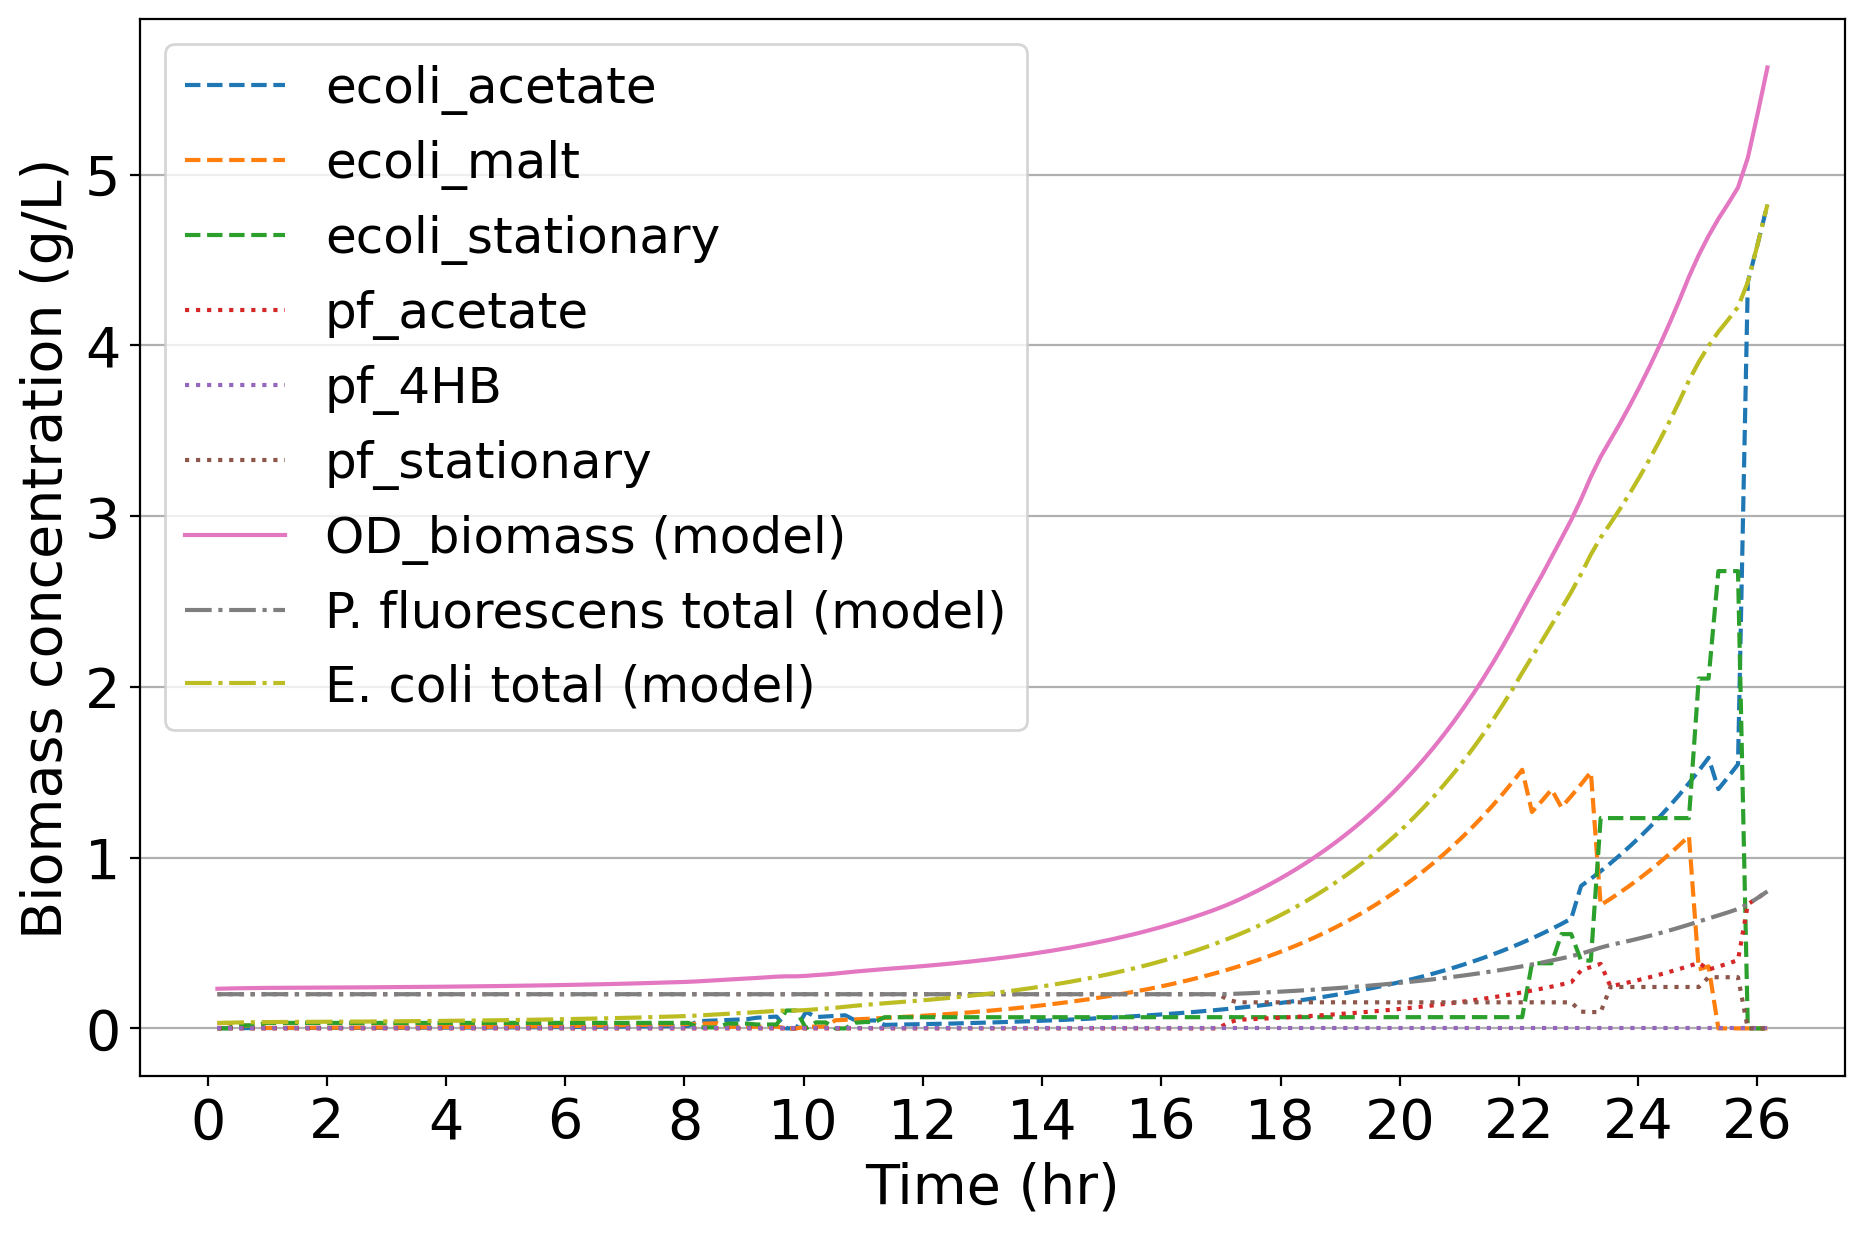

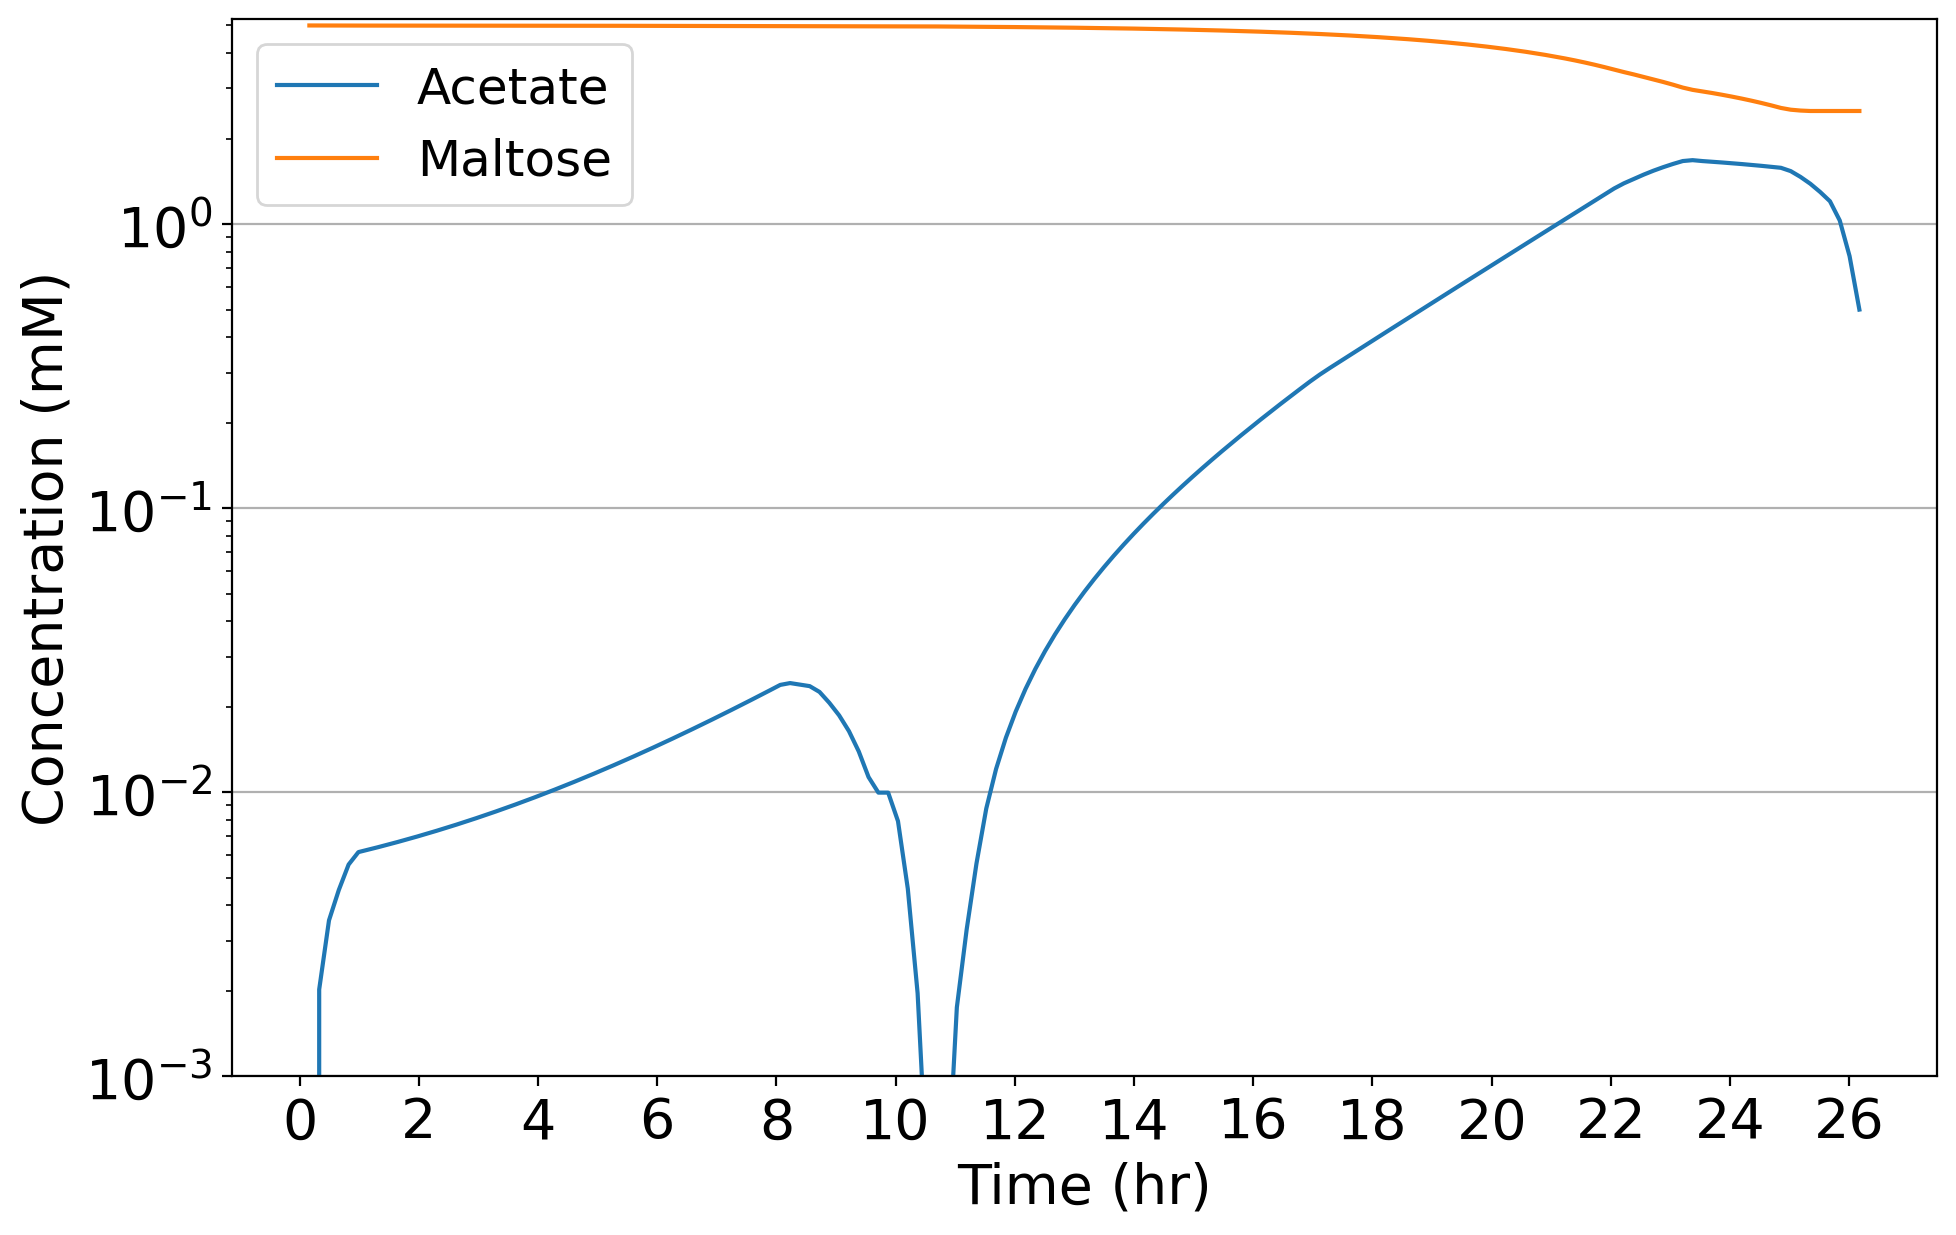

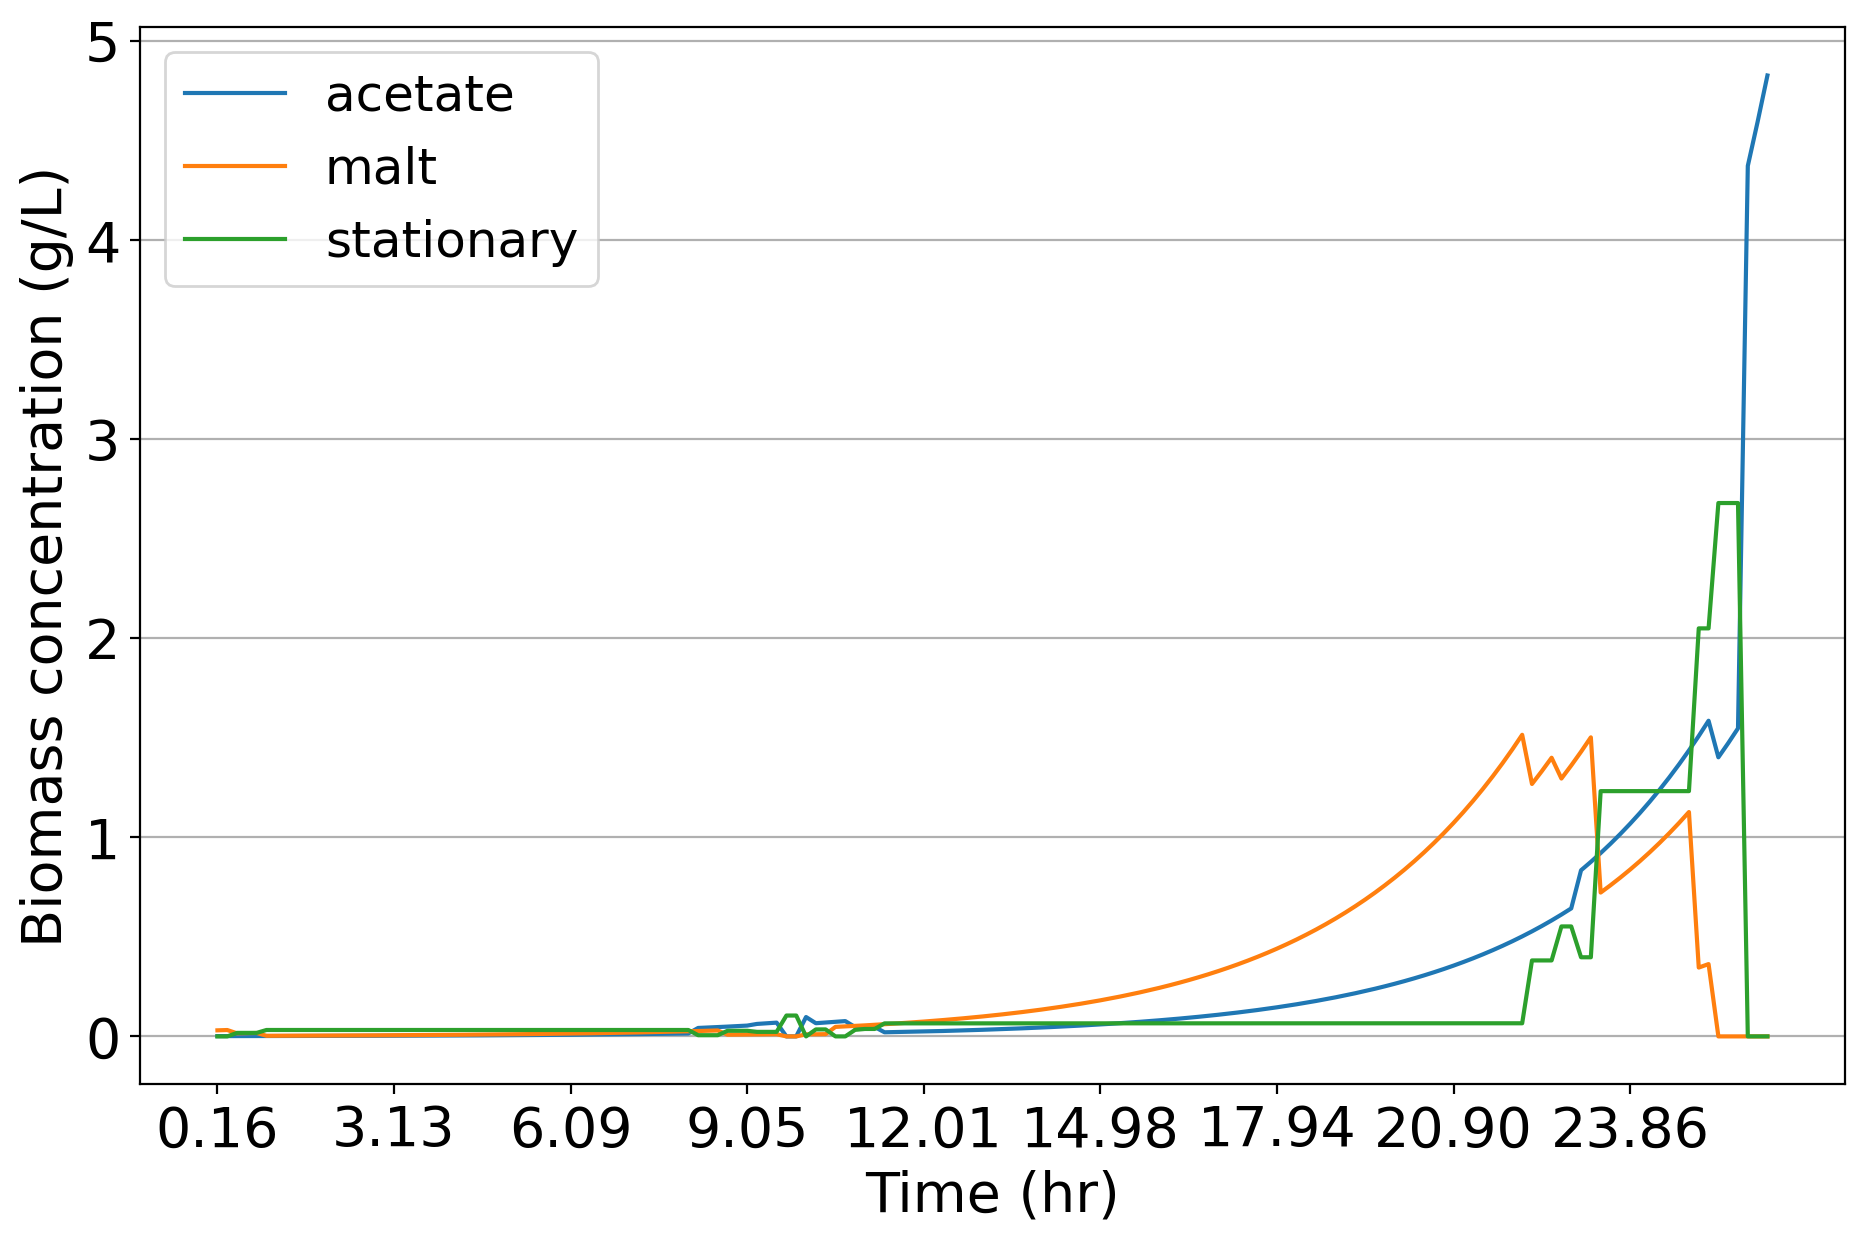

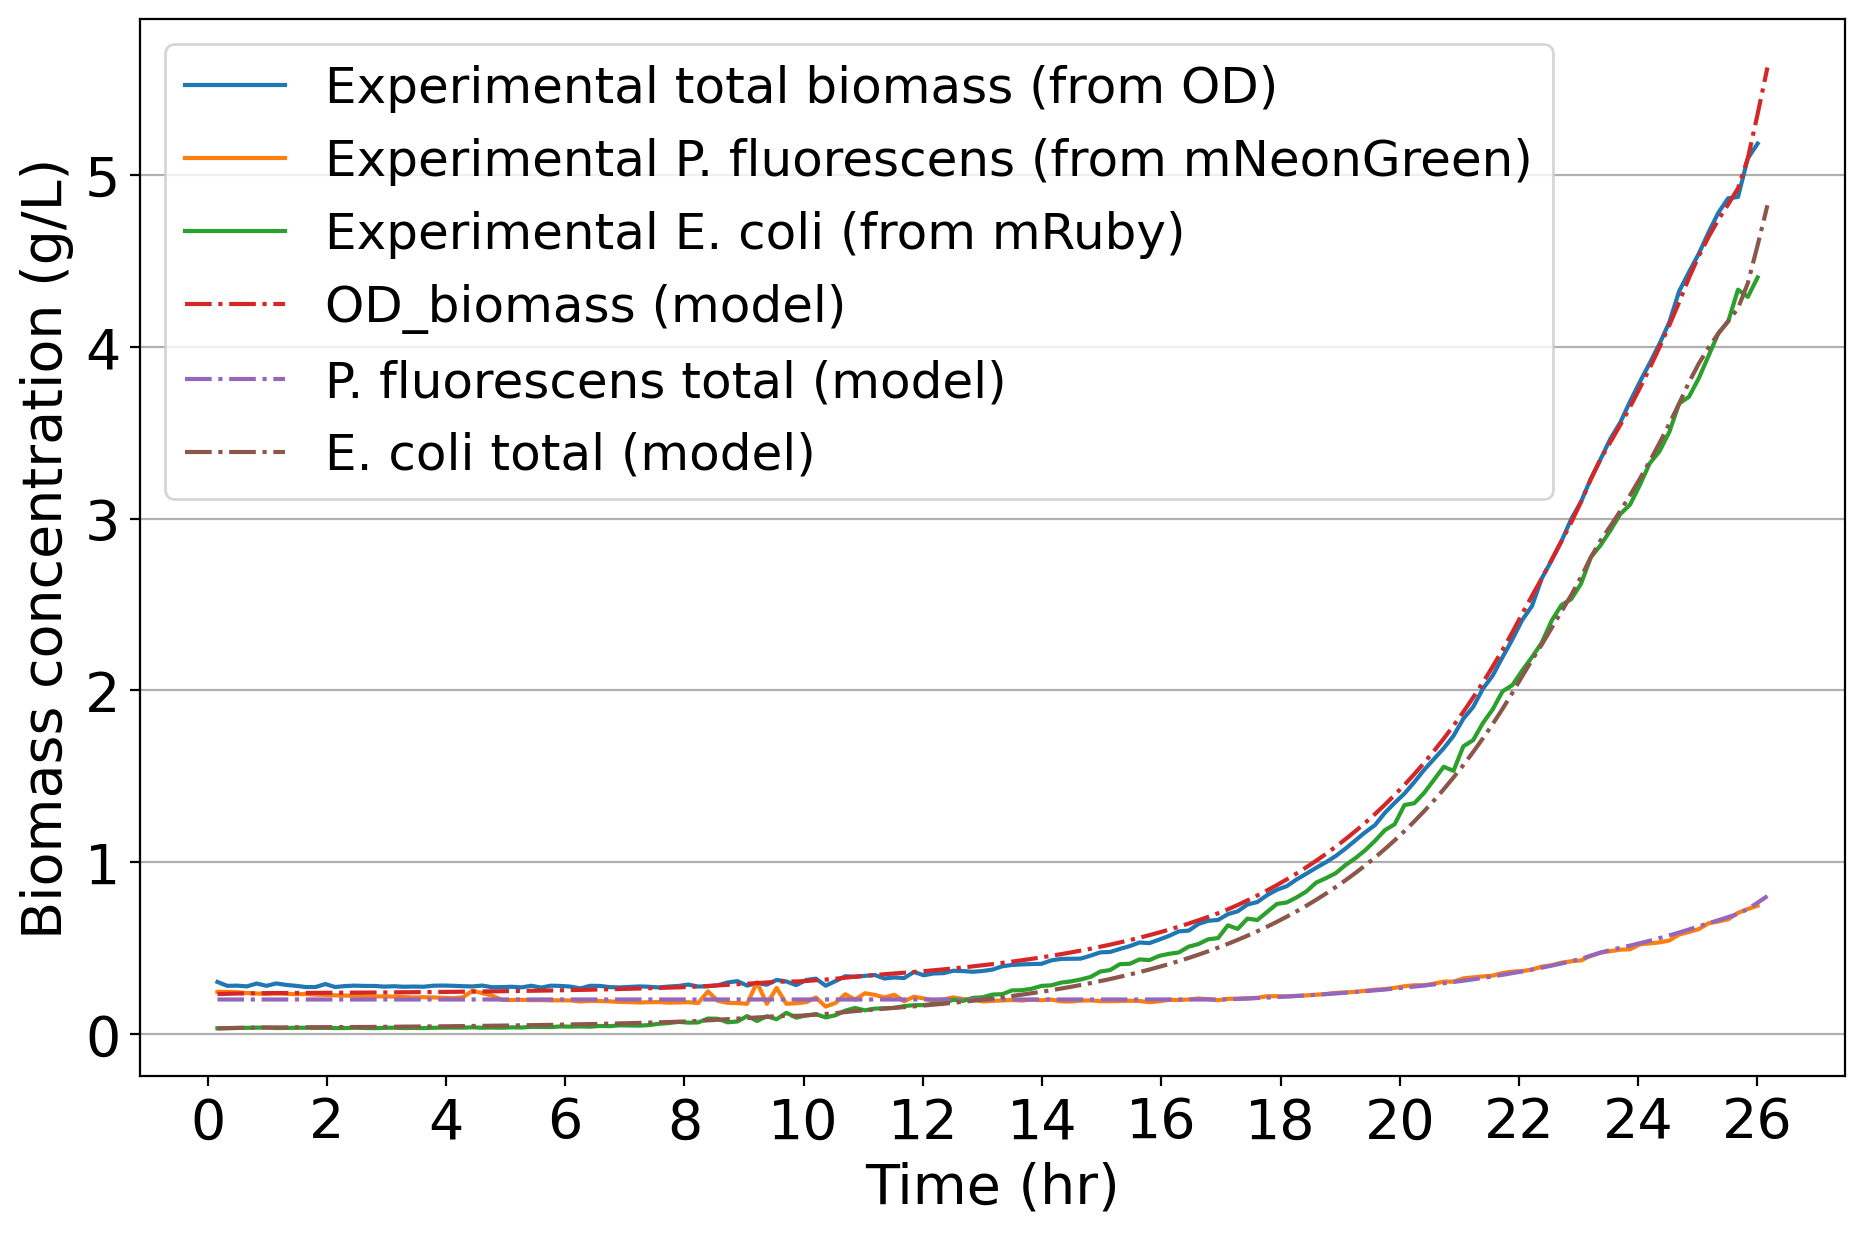

In [4]:
%run mscommfitting.py

commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     rel_final_conc = {"cpd00179":0.5},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
     mets_to_track = ["cpd00179","cpd00029"],
       graphs = update_graphs("G3", None), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

In [ ]:
display(trial_name_conversion)

In [ ]:
display(experimental_metadata)

In [ ]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     carbon_sources = {"cpd00179":0.2,},    
     mets_to_track = ["cpd00179","cpd00029"],
     zero_start=["cpd00029"],
       graphs = update_graphs("G3"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

### G6, with 1:1 Ecoli:PF

In [ ]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

In [ ]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     final_rel_c12_conc = 0.1,
     mets_to_track = ["cpd00179","cpd00029"],
     zero_start=["cpd00029"],
       graphs = [
            {
                'trial':'G6',
                "phenotype": '*',
                'content': 'biomass',
                'experimental_data': False
            },
            {
                'trial':'G6',
                'content': "conc",
            },
            {
                'trial':'G6',
                "phenotype": '*',
                "species":["ecoli"],
                'content': 'biomass'
            }
        ], 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

### G2, 1:50 Ecoli:PF

In [ ]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

### G4, 1:10 Ecoli:PF

In [3]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': ["cpd00029"], #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': ["cpd00179"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': ["cpd00029"], # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': ["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:108: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd03191_e0 is a ModelSEED ID, and may not be desirably changed to cpd03191_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (sq-e_e0 | Sulphoquinovose | Sulphoquinovose) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (metglcur-e_e0 | 1-O-methyl-Beta-D-glucuronate | Omethylbetadglucuronate | 1-O-methyl-Beta-D-glucuronate) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - Mode



3 reactions were substituted and 7 metabolite IDs were redefined in iML1515 by standardize().

The exchange 'EX_cpd00609_e0' is incorrectly defined in the iML1515 model.


The exchange 'EX_cpd03191_e0' is incorrectly defined in the iML1515 model.

Minimize
1.0*EX_cpd00029_e0 - 1.0*EX_cpd00029_e0_reverse_7bbb8


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


-0.3011352193946037


modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd03191_e0 is a ModelSEED ID, and may not be desirably changed to cpd03191_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (sq-e_e0 | Sulphoquinovose | Sulphoquinovose) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (metglcur-e_e0 | 1-O-methyl-Beta-D-glucuronate | Omethylbetadglucuronate | 1-O-methyl-Beta-D-glucuronate) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (colipap-e_e0 | Core oligosaccharide lipid A diphosphate | Core oligosaccharide lipid A diphosphate) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - WARNING - IDWarnin



3 reactions were substituted and 7 metabolite IDs were redefined in iML1515 by standardize().

The exchange 'EX_cpd00609_e0' is incorrectly defined in the iML1515 model.


The exchange 'EX_cpd03191_e0' is incorrectly defined in the iML1515 model.

Minimize
1.0*EX_cpd00179_e0 - 1.0*EX_cpd00179_e0_reverse_356c6


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


-1.0


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\core\model.py:522: DeprecationWarning: add_reaction deprecated. Use add_reactions instead
  warn("add_reaction deprecated. Use add_reactions instead", DeprecationWarning)
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (r1535_e0 | H+ involved in electron transport and ATP generation | H+ involved in electron transport and ATP generation) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - ERROR - The iSB1139 model has residual non-standard metabolites in its exchange reactions: {'r1535_e0'}. Specify a True `printing` parameter to view why these metabolites were not corrected.
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:



4 reactions were substituted and 7 metabolite IDs were redefined in iSB1139 by standardize().

The exchange 'EX_cpd00609_e0' is incorrectly defined in the iSB1139 model.

Minimize
1.0*EX_cpd00029_e0 - 1.0*EX_cpd00029_e0_reverse_7bbb8
-0.5467568596811528


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\core\model.py:522: DeprecationWarning: add_reaction deprecated. Use add_reactions instead
  warn("add_reaction deprecated. Use add_reactions instead", DeprecationWarning)
modelseedpy.community.mscompatibility - WARNING - IDWarning: The original ID cpd00609_e0 is a ModelSEED ID, and may not be desirably changed to cpd00609_e0.
modelseedpy.community.mscompatibility - WARNING - ModelSEEDError: The metabolite (r1535_e0 | H+ involved in electron transport and ATP generation | H+ involved in electron transport and ATP generation) is not recognized by the ModelSEED Database
modelseedpy.community.mscompatibility - ERROR - The iSB1139 model has residual non-standard metabolites in its exchange reactions: {'r1535_e0'}. Specify a True `printing` parameter to view why these metabolites were not corrected.
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:



4 reactions were substituted and 7 metabolite IDs were redefined in iSB1139 by standardize().

The exchange 'EX_cpd00609_e0' is incorrectly defined in the iSB1139 model.

Minimize
1.0*EX_cpd00136_e0 - 1.0*EX_cpd00136_e0_reverse_afcbc
-1.0000000000000044
The ['B2', 'B3', 'B4', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.25743282 1.25756953 1.25646515 1.25160708 1.25131364 1.24656429
 1.23908944 1.24441001 1.24179058 1

### forced consumption of Acetate

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:78: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.0036458333333333334 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.090625 min
Done exporting the content: 0.04348958333333333 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'trial': 'G4'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G4'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G4'}


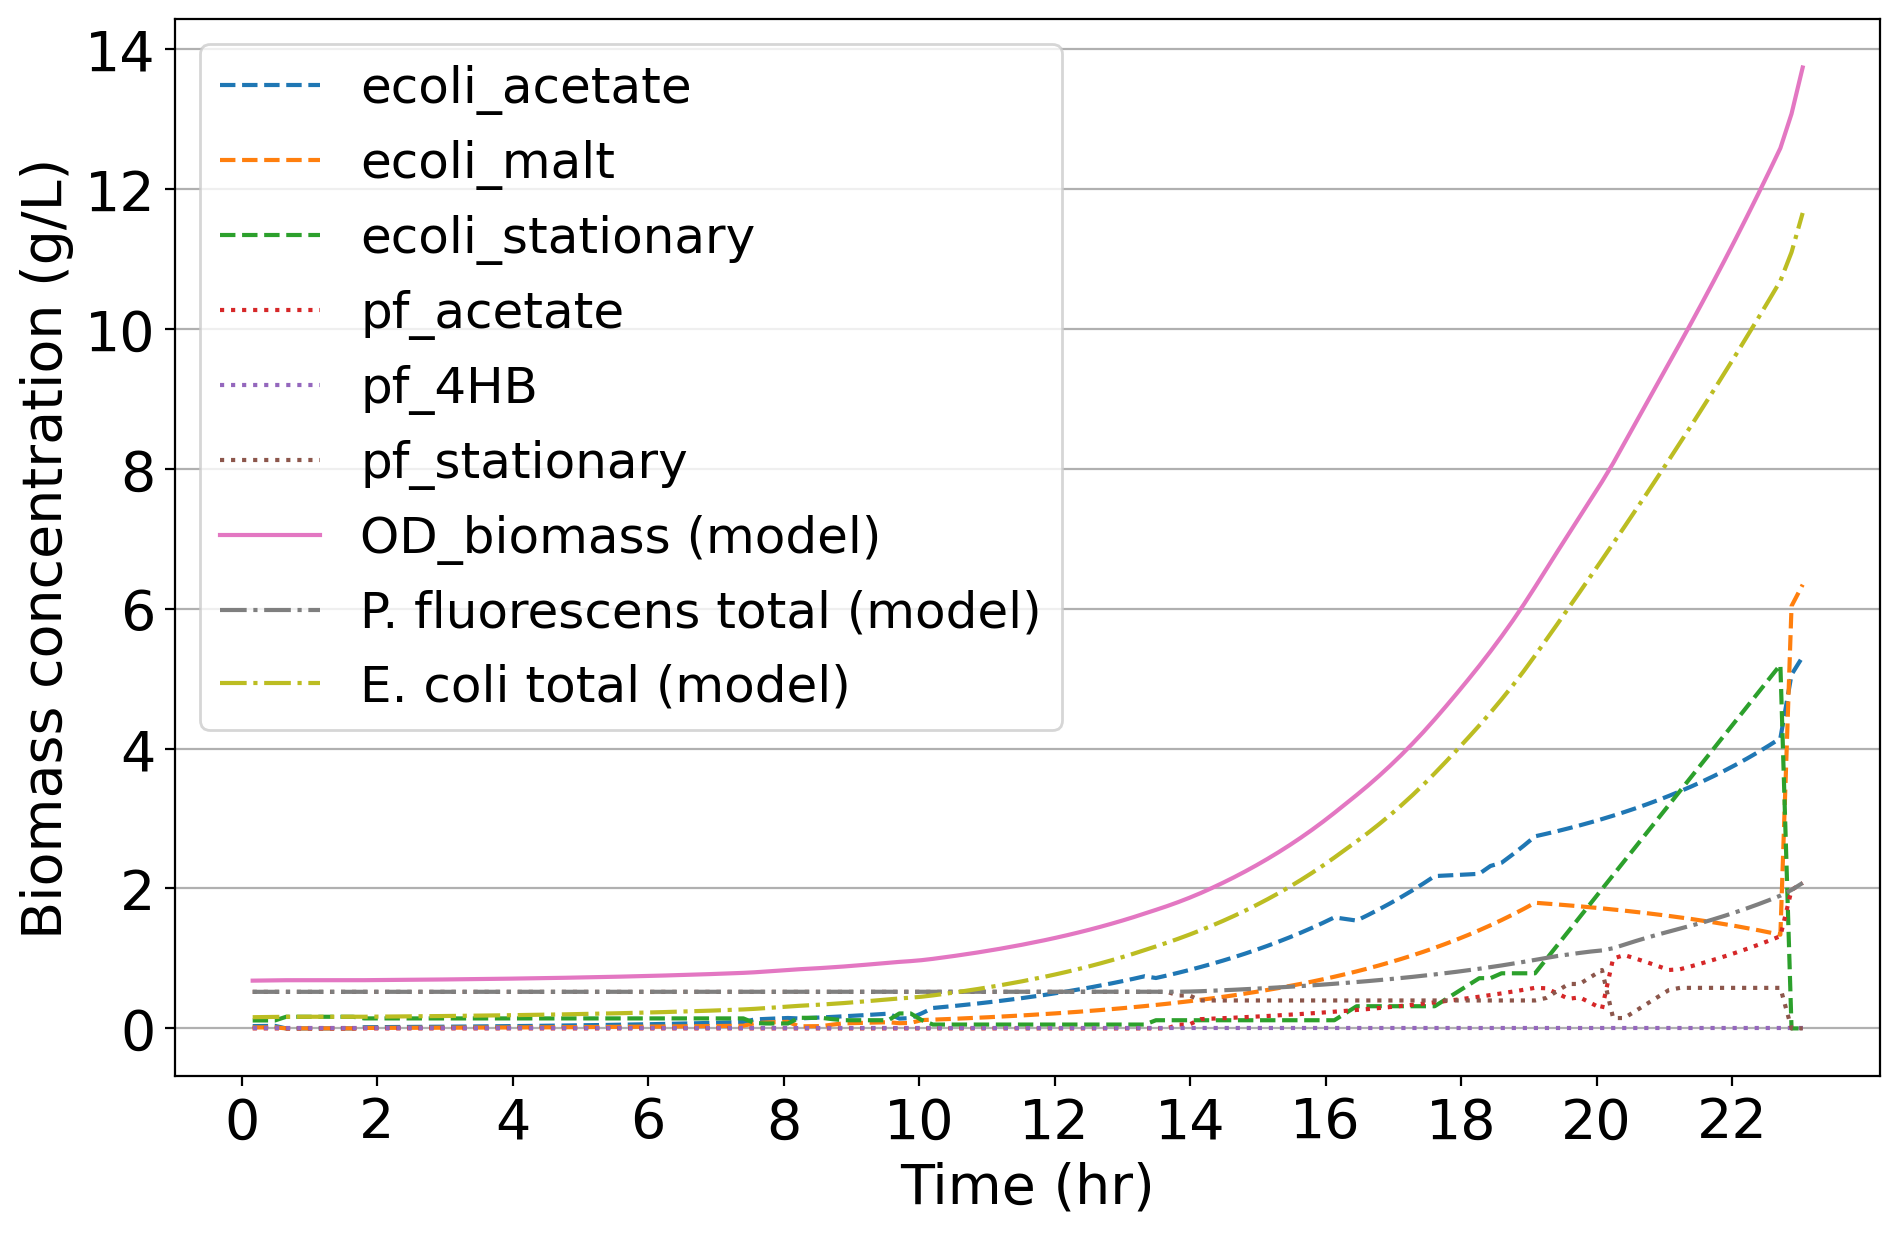

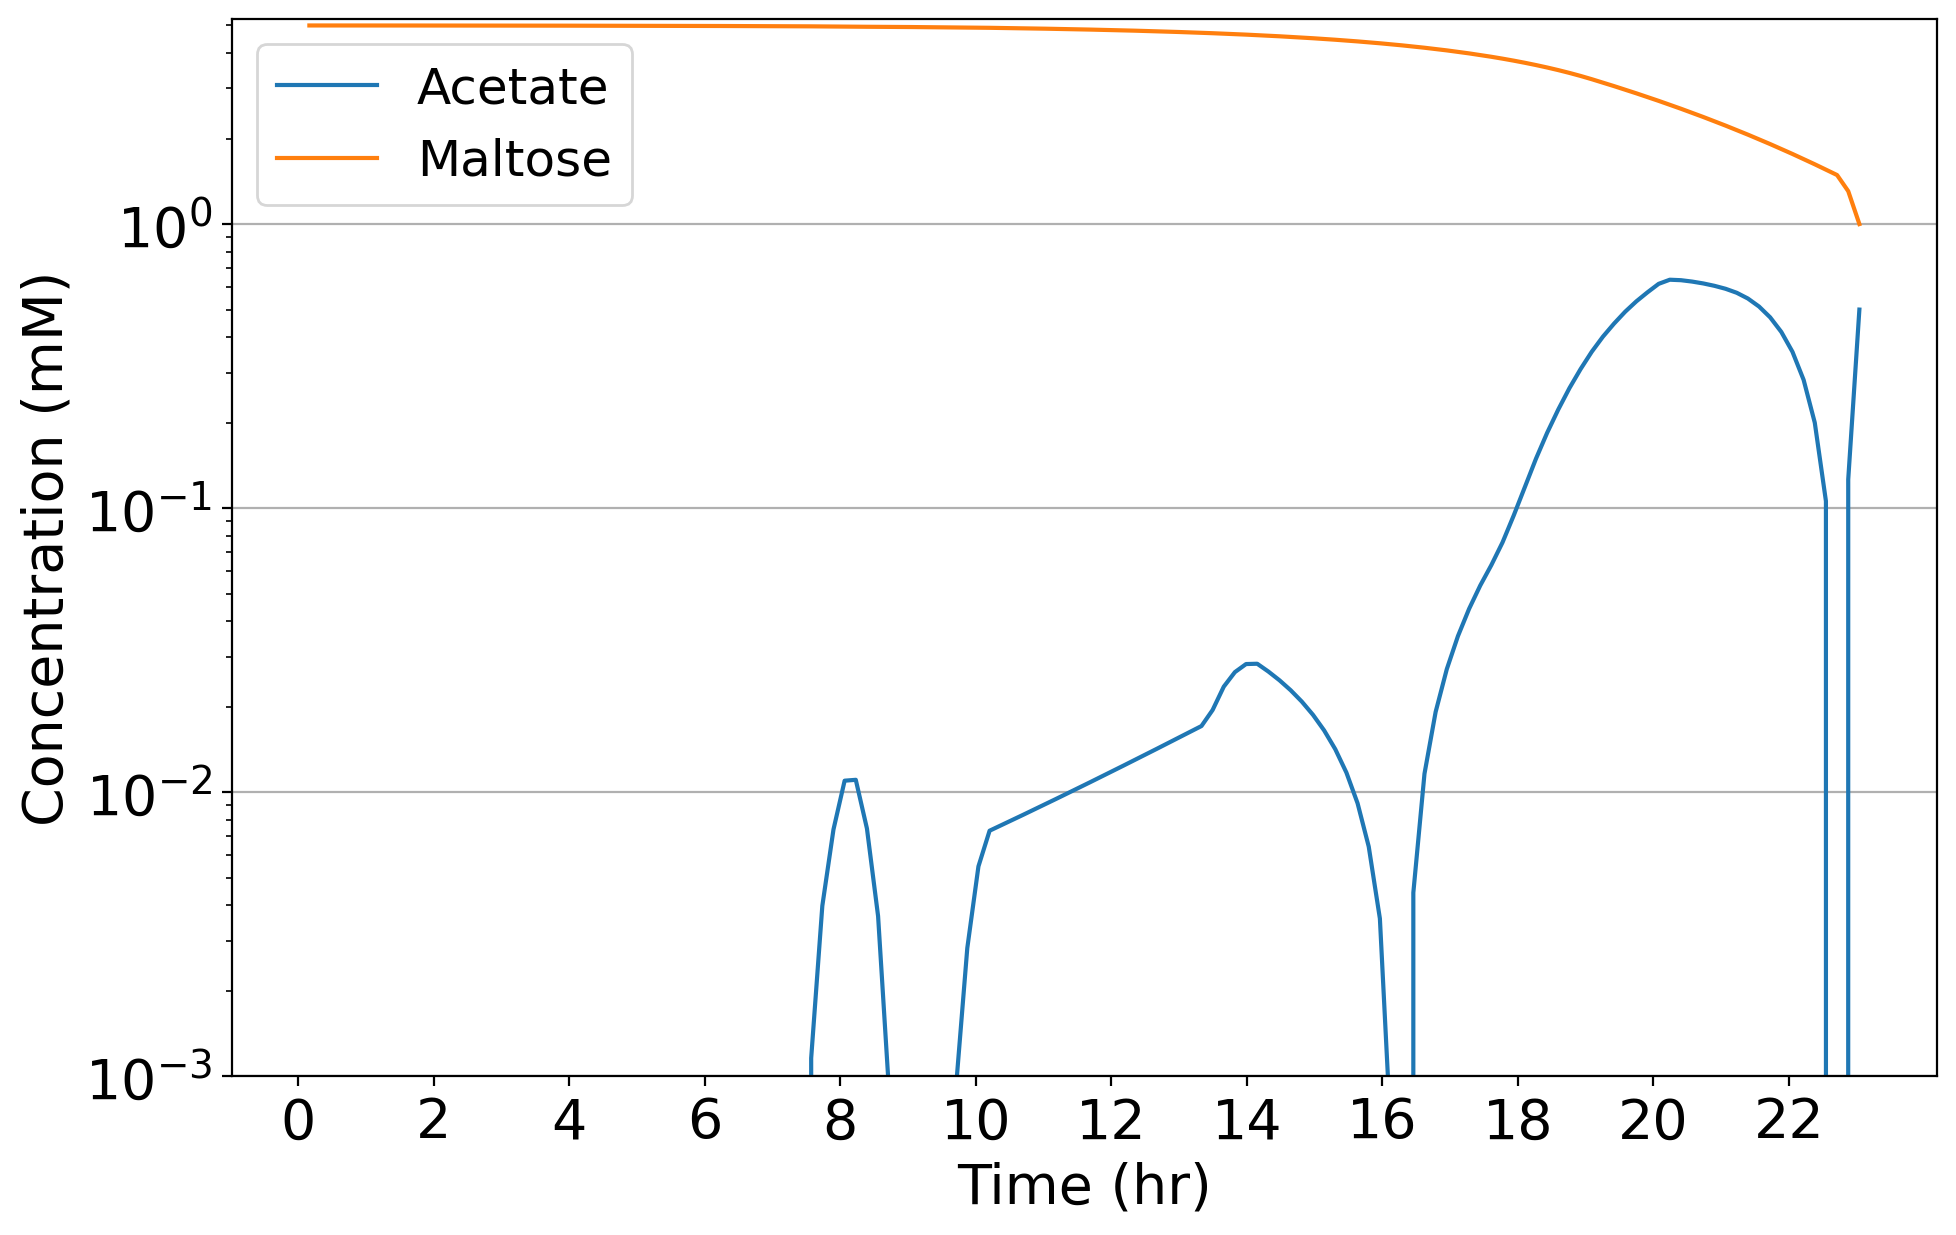

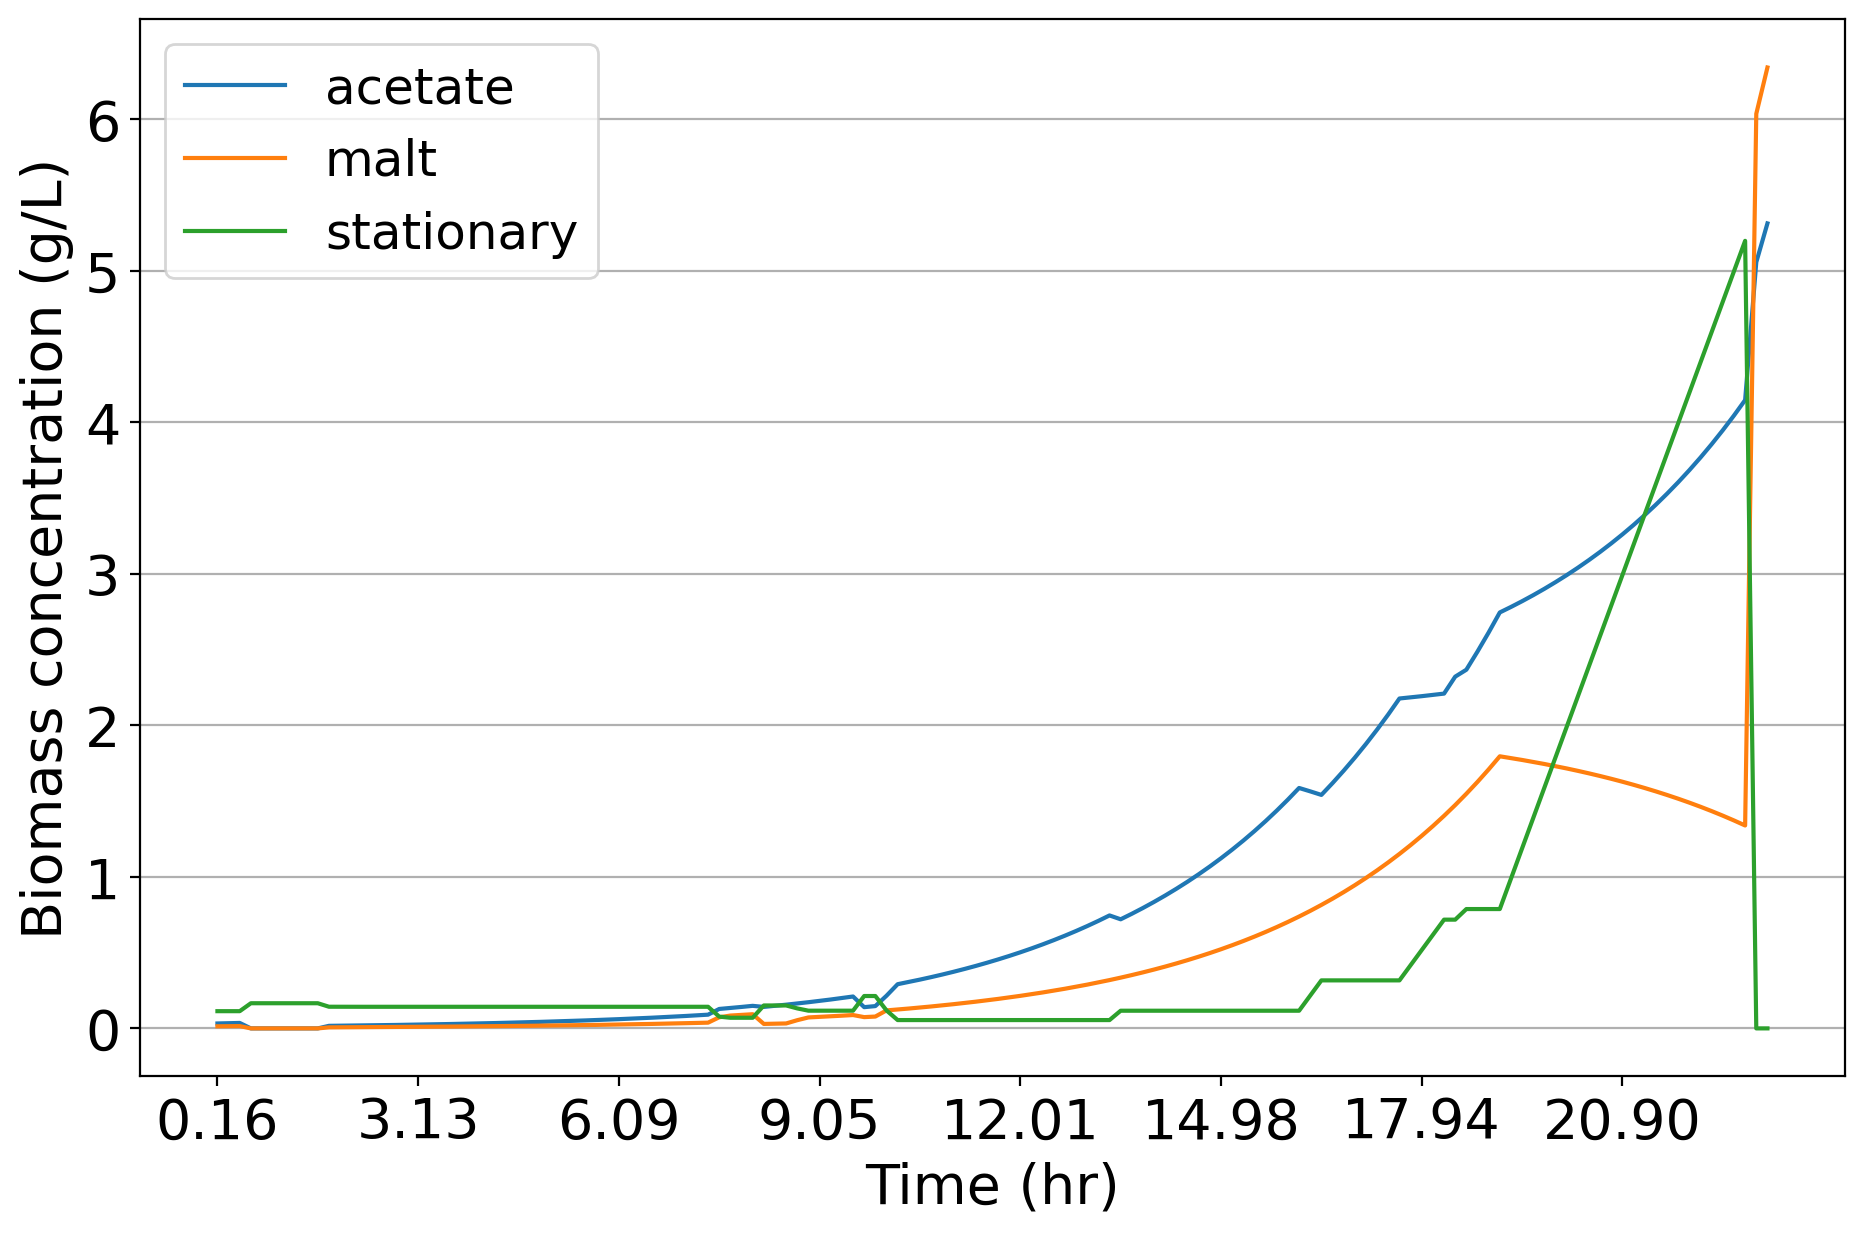

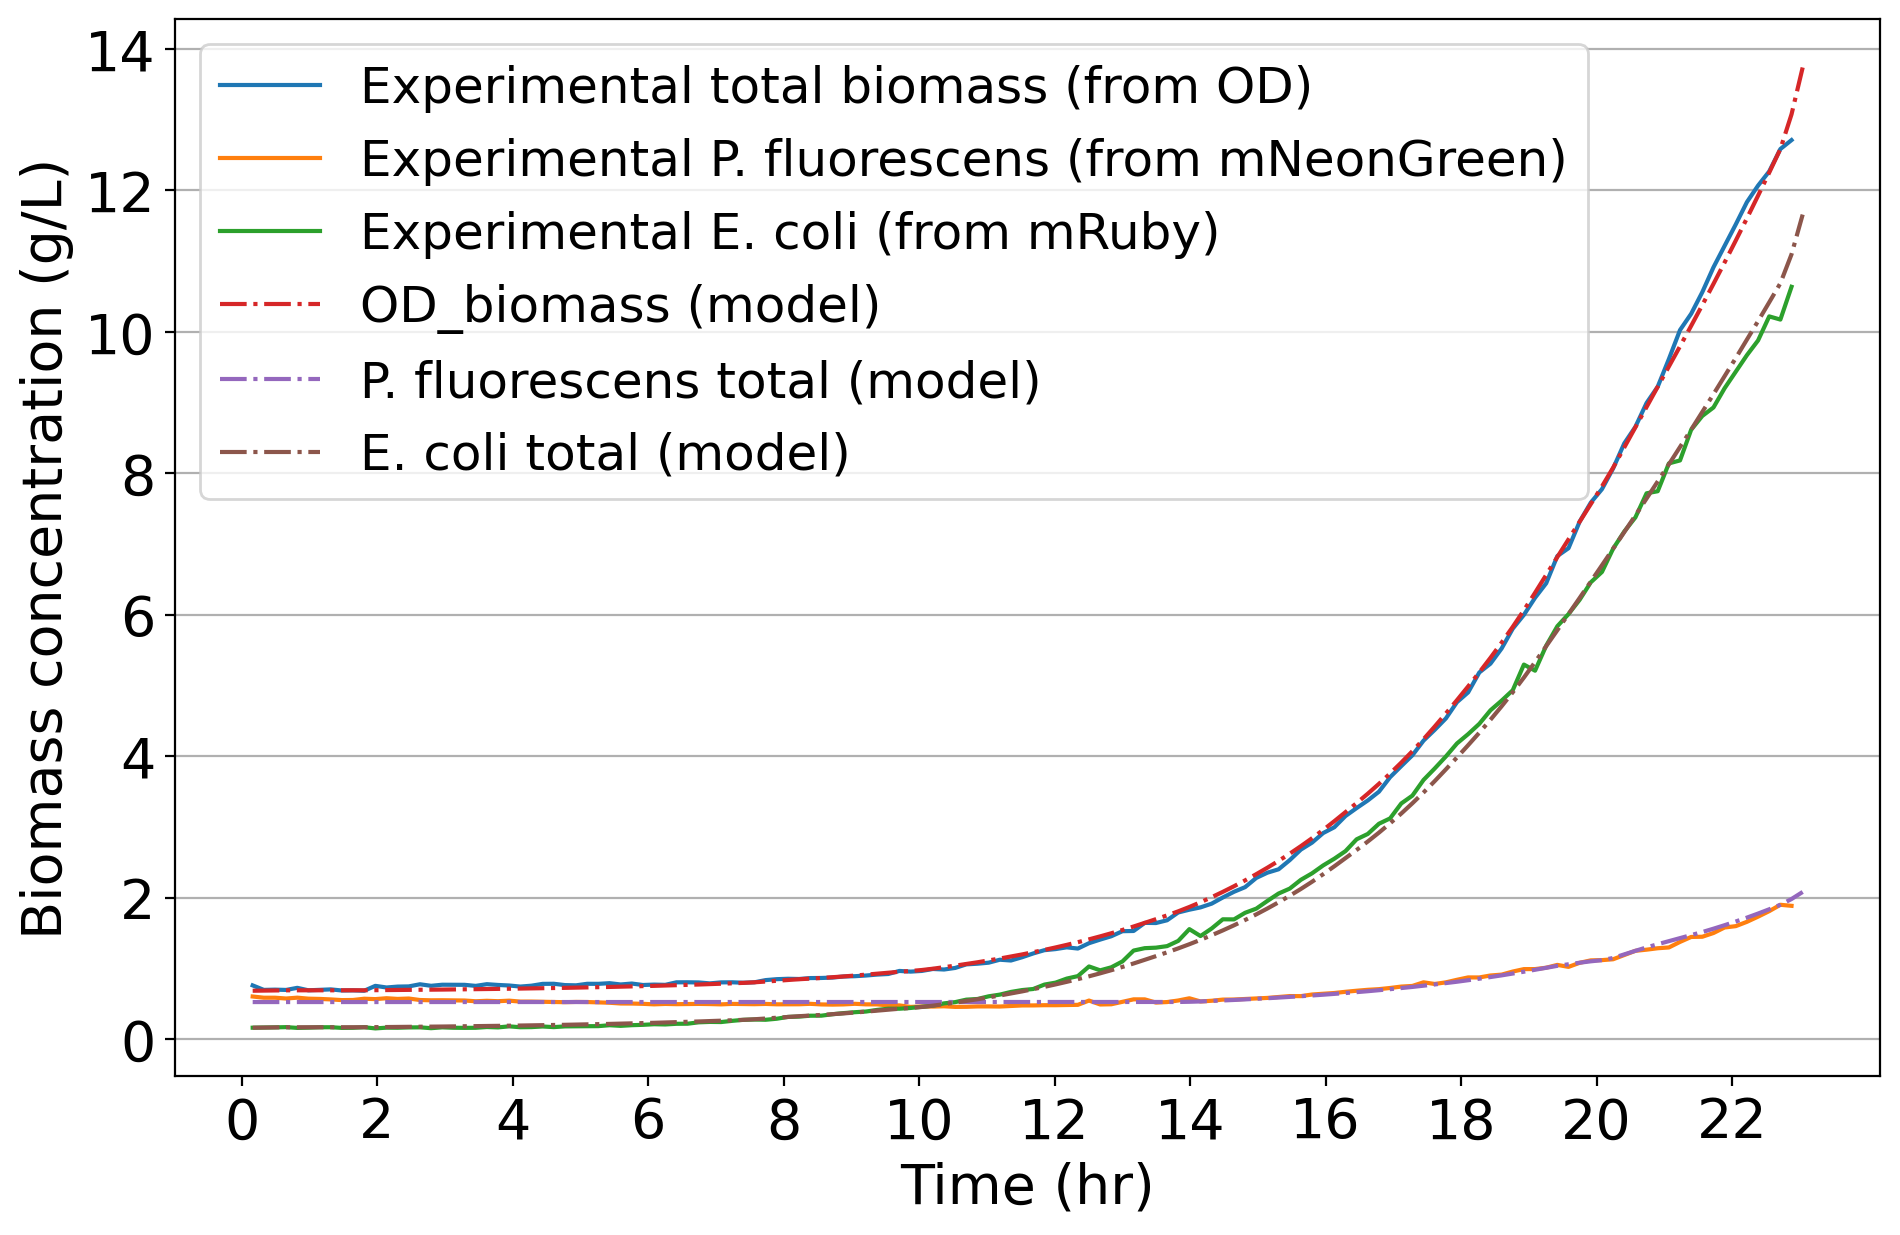

In [14]:
%run mscommfitting.py

commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G4", None), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

In [ ]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     carbon_sources = {"cpd00179":0.2},
     zero_start=["cpd00029"],
       graphs = update_graphs("G4"), 
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)

# Maltose+4HB

In [ ]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = {
        1:{"ecoli":0, "pf":1},
        2:{"ecoli":1, "pf":50},
        3:{"ecoli":1, "pf":20},
        4:{"ecoli":1, "pf":10},
        5:{"ecoli":1, "pf":3},
        6:{"ecoli":1, "pf":1},
        7:{"ecoli":3, "pf":1},
        8:{"ecoli":10, "pf":1},
        9:{"ecoli":20, "pf":1},
        10:{"ecoli":1, "pf":0},
        11:{"ecoli":0, "pf":0}
      },
    carbon_conc_series = {'rows': {
        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
    }},
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"ecoli":"mRuby"},
        4:{"ecoli":"ACS"},
        5:{"ecoli":"mRuby"},
        6:{"ecoli":"ACS"}
    }
)

#### Probing the feasibility limit of [Acetate]

In [ ]:
# identify a final Acetate concentration that is feasible
from numpy import logspace, linspace
# problems = {}
# for conc in linspace(.09, .1, 10):
#     %run mscommfitting.py
#     problems[conc] = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
#     try:
#         problems[conc].fit(
#             parameters={
#                 'v':.4,
#                 'cvmin': 100,
#                 'bcv': 100,
#                 'diffpos': 100,
#                 'diffneg': 100
#                 }, 
#              mets_to_track = ["cpd00179","cpd00029","cpd00136"],
#                graphs = update_graphs("G48", None), 
#              rel_final_conc = {"cpd00179":.8, "cpd00136":0.2},
#              zero_start=["cpd00029"],
#             abs_final_conc={"cpd00029":conc}, # metabolomics data
#              # export_zip_name='for_michaelis_menten.zip', 
#              # data_timesteps = {"A3":list(range(10))},
#             # msdb_path='../../../ModelSEEDDatabase',
#             msdb_path='../../../ModelSEED/ModelSEEDDatabase',
#             publishing=True)
#         print(conc, "\t\tSuccess", "\n\n")
#     except Exception as e:
#         print(conc, "\t\t", e, "\n\n")

problems = {}
for conc in [0.09, 0.099]:
    %run mscommfitting.py
    problems[conc] = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
    try:
        problems[conc].fit(
            parameters={
                'v':.4,
                'cvmin': 100,
                'bcv': 100,
                'diffpos': 100,
                'diffneg': 100
                }, 
             mets_to_track = ["cpd00179","cpd00029","cpd00136"],
               graphs = update_graphs("G48", None), 
             rel_final_conc = {"cpd00179":.8, "cpd00136":0.2},
             zero_start=["cpd00029"],
            abs_final_conc={"cpd00029":conc}, # metabolomics data
             # export_zip_name='for_michaelis_menten.zip', 
             # data_timesteps = {"A3":list(range(10))},
            # msdb_path='../../../ModelSEEDDatabase',
            msdb_path='../../../ModelSEED/ModelSEEDDatabase',
            publishing=True)
        print(conc, "\t\tSuccess", "\n\n")
    except Exception as e:
        print(conc, "\t\t", e, "\n\n")

#### Confirming that perturbing the carbon source consumption is ineffectual for the feasibility limit of the final [Aceate]

In [ ]:
# identify a final Acetate concentration that is feasible
from numpy import logspace
problems = {}
for conc in logspace(-.5, -3, 10):
    %run mscommfitting.py
    problems[conc] = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
    try:
        problems[conc].fit(
            parameters={
                'v':.4,
                'cvmin': 100,
                'bcv': 100,
                'diffpos': 100,
                'diffneg': 100
                }, 
             mets_to_track = ["cpd00179","cpd00029","cpd00136"],
               graphs = update_graphs("G48", None), 
             rel_final_conc = {"cpd00179":.01, "cpd00136":0.01},
             zero_start=["cpd00029"],
            abs_final_conc={"cpd00029":conc}, # metabolomics data
             # export_zip_name='for_michaelis_menten.zip', 
             # data_timesteps = {"A3":list(range(10))},
            # msdb_path='../../../ModelSEEDDatabase',
            msdb_path='../../../ModelSEED/ModelSEEDDatabase',
            publishing=True)
        print(conc, "\t\tSuccess", "\n\n")
    except Exception as e:
        print(conc, "\t\t", e, "\n\n")

# Acetate

In [ ]:
%run ./data/standardized_data/datastandardization.py
growth_data_path="data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, signal_species, trial_name_conversion, species_phenos_df, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    base_media=kbase_api.get_from_ws("93465/19/1"),
    community_members = {
        kbase_api.get_from_ws("iML1515",76994): {
            'name': 'ecoli', 
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, #kbase_api.get_from_ws('93465/13/1'), 
                        'malt': {"cpd00179":[-1,-1]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        },
        kbase_api.get_from_ws("iSB1139.kb.gf",30650): {
            'name': 'pf',
            'phenotypes': {'acetate': {"cpd00029":[-1,-1]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                        '4HB': {"cpd00136":[-1,-1]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'Fluorescence':'pf', 'Fluorescence 1':'ecoli'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {
        'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3},
    }},
    ignore_trials = {'rows': ['C', 'D', 'B', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    # ignore_timesteps="10:",  # The 
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)

#### Find the trial instances that contain the coculture "E" trials

In [ ]:
# from pandas import ExcelFile
# acetate_experiment = ExcelFile("data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx").parse("Fluorescence 1")
# acetate_experiment.columns = acetate_experiment.iloc[6]
# acetate_experiment.drop(acetate_experiment.index[:7], inplace=True)
# acetate_experiment.index = acetate_experiment['Well']
# acetate_experiment.drop('Well', axis=1, inplace=True)
# coculture_trials = acetate_experiment[acetate_experiment.index.str.contains("E")]
# coculture_trials = coculture_trials[coculture_trials["Cycle #"] == "Result"]
# display(coculture_trials.iloc[0::1])

In [ ]:
display(trial_name_conversion)
display(experimental_metadata)

In [ ]:
# display(experimental_metadata)
display(growth_df)
# display(fluxes_df)

In [ ]:
%run mscommfitting.py

commfit = MSCommFitting(fluxes_df, standardized_carbon_conc, media_conc, signal_species, species_phenos_df, growth_df, experimental_metadata)
commfit.fit(
    parameters={
        'v':.3,
        'cvmin': 100,
        'bcv': 100,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G38", None), 
     rel_final_conc = {"cpd00029":0.2},
     # export_zip_name='for_michaelis_menten.zip', 
     # data_timesteps = {"A3":list(range(10))},
    msdb_path='../../../ModelSEED/ModelSEEDDatabase',
    publishing=True)